In [ ]:
"""
STEP 1: IMPORTING REQUIRED LIBRARIES
=====================================

This section imports all the Python libraries we'll use throughout the project.

What each library does and WHY we need it:
- kagglehub: Downloads datasets directly from Kaggle (a platform for data science datasets)
- pandas (pd): The main tool for working with tabular data (think Excel, but in Python)
            We use it to load, clean, and manipulate our transaction data
- numpy (np): Handles numerical computations efficiently (fast math on large datasets)
- matplotlib.pyplot (plt): Creates basic plots and visualizations to understand our data
- seaborn (sns): Builds on matplotlib to create more sophisticated and visually appealing charts
- warnings: Manages warning messages (we'll suppress them to keep output clean)
- os: Handles file system operations (checking paths, listing files, etc.)

WHY import everything at the top?
This is a best practice - it makes dependencies clear and ensures all tools are available
before we start the analysis.
"""

import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

In [58]:
"""
STEP 2: LOADING THE DATA
=========================

This cell configures our environment and loads the fraud detection dataset.

What happens here:
1. sns.set(style="whitegrid"): Sets the default style for all our visualizations
   WHY? A consistent, clean style makes charts easier to read and more professional
   
2. warnings.filterwarnings("ignore"): Suppresses warning messages
   WHY? Warnings can clutter the output. We're using stable, well-tested code, 
   so warnings about deprecated features won't affect our analysis
   
3. kagglehub.dataset_download(): Downloads the dataset from Kaggle
   HOW IT WORKS: This function downloads the dataset and returns the path where it's stored
   WHY? We need actual transaction data to train our fraud detection model
   
4. os.listdir(data_path)[0]: Gets the first file name from the downloaded folder
   WHY? Kaggle datasets may contain multiple files; we're taking the first one
   (in this case, we know it's our CSV file with transaction data)
   
5. pd.read_csv(): Loads the CSV file into a pandas DataFrame
   WHAT'S A DATAFRAME? It's like a spreadsheet in Python - rows and columns of data
   WHY? DataFrames are the standard format for data analysis in Python - they make
   it easy to filter, analyze, and visualize our data
"""

# Configure visualization style - "whitegrid" provides a clean background with subtle gridlines
sns.set(style="whitegrid")

# Suppress warnings to keep output clean and focused
warnings.filterwarnings("ignore")

# Download the fraud detection dataset from Kaggle
# This returns the local path where the dataset is stored
data_path = kagglehub.dataset_download("amanalisiddiqui/fraud-detection-dataset")

# Get the filename of the downloaded dataset (first file in the folder)
data_file_name = os.listdir(data_path)[0]

# Load the CSV file into a pandas DataFrame for analysis
# A DataFrame is a table-like structure perfect for working with structured data
df = pd.read_csv(os.path.join(data_path, data_file_name))

In [59]:
"""
STEP 3: INITIAL DATA EXPLORATION
=================================

WHY we do this:
The first thing in any data analysis is to LOOK at your data. This helps us:
- Understand the structure: What columns do we have? What do they represent?
- Spot obvious issues: Missing values, incorrect data types, unexpected values
- Get familiar with the data before diving into analysis

What .head() does:
- Shows the first 5 rows of our dataset
- This is like peeking at the top of a spreadsheet
- It's a quick way to see what kind of information we're working with

What we're looking for:
- Column names and what they represent
- Data types (numbers, text, etc.)
- Example values to understand the scale and format
"""

# Display the first 5 rows to understand the data structure
# This gives us a quick preview of what our data looks like
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [60]:
"""
STEP 4: UNDERSTANDING DATA TYPES AND STRUCTURE
===============================================

WHY use .info()?
This method provides a comprehensive overview of our dataset's structure.
It's like getting a "health check" of our data.

What .info() tells us:
1. Number of entries: How many rows (transactions) do we have?
2. Number of columns: How many features (variables) describe each transaction?
3. Data types: Are columns numeric (int64, float64) or text (object)?
   - int64: Whole numbers (e.g., isFraud: 0 or 1)
   - float64: Decimal numbers (e.g., amount: 1234.56)
   - object: Text/strings (e.g., type: "PAYMENT", "TRANSFER")
4. Non-null counts: How many non-missing values in each column?
5. Memory usage: How much RAM our dataset requires

WHY is this important?
- We need to know if we have missing data (affects model training)
- We need to identify categorical (text) vs numerical columns for preprocessing
- Memory usage helps us understand if we need to optimize for large datasets
"""

# Get detailed information about the dataset structure
# This shows data types, non-null counts, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [61]:
"""
STEP 5: EXAMINING COLUMN NAMES
===============================

WHY check column names?
Understanding what each column represents is crucial before analysis.
This helps us plan which features to use in our model.

What each column means:
- step: Time step (each step = 1 hour in a simulation of 30 days)
- type: Transaction type (PAYMENT, TRANSFER, CASH_OUT, DEBIT, CASH_IN)
- amount: Transaction amount in local currency
- nameOrig: Customer who initiated the transaction
- oldbalanceOrg: Balance before transaction (sender)
- newbalanceOrig: Balance after transaction (sender)
- nameDest: Transaction recipient
- oldbalanceDest: Balance before transaction (receiver)
- newbalanceDest: Balance after transaction (receiver)
- isFraud: Target variable - 1 if fraudulent, 0 if legitimate
- isFlaggedFraud: System-flagged transactions (old fraud detection system)
"""

# Display all column names in the dataset
# This gives us a clear list of all features available
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [62]:
"""
STEP 6: ANALYZING CLASS IMBALANCE
==================================

WHY check this?
In fraud detection, we typically have MANY more legitimate transactions than fraudulent ones.
This is called "class imbalance" and it's a major challenge in machine learning.

What .value_counts() does:
Counts how many times each unique value appears in the column.
For isFraud: counts how many 0s (legitimate) and 1s (fraudulent) we have.

What we expect to see:
- A huge number of 0s (legitimate transactions)
- A small number of 1s (fraudulent transactions)
- Ratio might be 99.9% legitimate vs 0.1% fraudulent

WHY is this important?
1. If we don't handle imbalance, our model will just predict "not fraud" for everything
   and still get 99.9% accuracy - but it's useless!
2. We need special techniques to handle this:
   - Class weighting (give more importance to rare fraud cases)
   - Sampling methods (SMOTE, undersampling)
   - Different evaluation metrics (precision, recall, F1-score instead of just accuracy)
"""

# Check the distribution of fraudulent vs non-fraudulent transactions
# This reveals the class imbalance in our target variable
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [63]:
"""
STEP 7: CHECKING SYSTEM-FLAGGED TRANSACTIONS
=============================================

WHY check isFlaggedFraud?
This column represents an OLD fraud detection system that was already in place.
We're building a NEW, better system, but it's interesting to see how the old one performed.

What to look for:
- How many transactions did the old system flag?
- Does it flag more or fewer than actual frauds (from isFraud column)?
- If it flags very few, the old system was probably too conservative (missed many frauds)
- We can compare our new model against this baseline

Expected result:
Usually, automated flagging systems are very conservative (flag very few transactions)
to avoid false positives (annoying legitimate customers).
"""

# Check how many transactions were flagged as fraudulent by the old system
# This gives us a baseline to compare our new model against
df["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [64]:
"""
STEP 8: CHECKING FOR MISSING VALUES
====================================

WHY check for missing values?
Missing data can break machine learning models or lead to incorrect predictions.
We need to know if data is missing so we can decide how to handle it.

What this code does:
1. df.isnull(): Creates a True/False table where True = missing value
2. .sum(): Counts True values per column (how many missing in each column)
3. .sum() again: Counts total missing values across ALL columns

Possible results:
- 0: Perfect! No missing data
- >0: We have missing values and need to handle them

How to handle missing values (if we had any):
- Remove rows with missing data (if few)
- Fill with average/median/mode (imputation)
- Create a "missing" indicator feature
- Use algorithms that handle missing values (like XGBoost)

WHY is this important?
Most machine learning algorithms can't handle missing values directly.
We need clean, complete data for training.
"""

# Check for missing values in the entire dataset
# Result: total count of missing (null) values across all columns
df.isnull().sum().sum()

np.int64(0)

In [65]:
"""
STEP 9: CHECKING DATASET DIMENSIONS
====================================

WHY check the shape?
Understanding dataset size helps us:
- Estimate processing time
- Plan memory requirements
- Understand if we have enough data for training

What .shape returns:
A tuple: (number_of_rows, number_of_columns)
- Rows = individual transactions (samples/examples)
- Columns = features (variables describing each transaction)

What to look for:
- More rows = more data = usually better for ML (but slower to process)
- More columns = more features = more information (but risk of overfitting)
- General rule: Need at least 10x samples per feature for good ML performance

In this case:
~6.3 million transactions with 11 features = excellent dataset size!
"""

# Get the dimensions of the dataset (rows, columns)
# Returns tuple: (number of transactions, number of features)
df.shape

(6362620, 11)

In [66]:
"""
STEP 10: CALCULATING FRAUD RATE
================================

WHY calculate the fraud rate?
This percentage shows exactly how imbalanced our dataset is.
It's a key metric for understanding the challenge we face.

How the calculation works:
1. df["isFraud"].value_counts()[1]: Count of fraudulent transactions (where isFraud=1)
2. df.shape[0]: Total number of transactions (all rows)
3. (fraud_count / total) * 100: Convert to percentage
4. round(..., 2): Round to 2 decimal places for readability

What this tells us:
- If <1%: Highly imbalanced (typical for fraud detection)
- If ~50%: Balanced dataset (rare in fraud detection)
- If >99%: Extremely imbalanced (might need special handling)

Expected result: ~0.13%
This means only 13 out of every 10,000 transactions are fraudulent!

WHY is this important?
This extreme imbalance means:
- We can't use simple accuracy as our metric (99.87% accuracy by always predicting "not fraud")
- We need to use precision, recall, and F1-score instead
- We must use techniques like class weighting or sampling
"""

# Calculate the percentage of fraudulent transactions in the dataset
# This shows the severity of class imbalance
round((df["isFraud"].value_counts()[1] / df.shape[0]) * 100, 2)

np.float64(0.13)

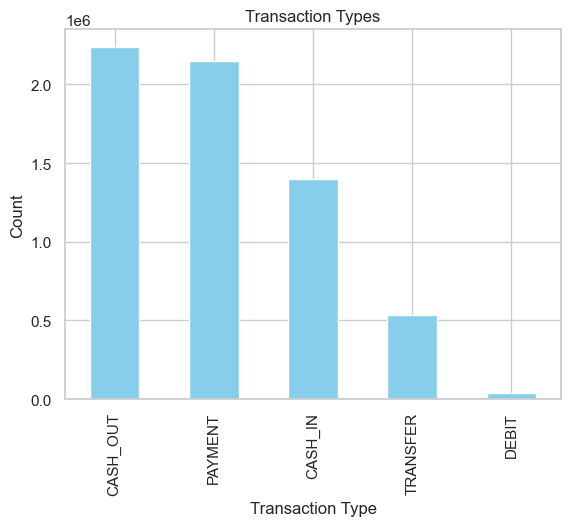

In [67]:
"""
STEP 11: VISUALIZING TRANSACTION TYPE DISTRIBUTION
===================================================

WHY create this visualization?
Understanding which transaction types are most common helps us:
- Identify patterns in the data
- Understand the business domain (what people do most)
- Plan our analysis (focus on common transaction types)

What this code does:
1. df["type"].value_counts(): Counts how many of each transaction type we have
2. .plot(kind="bar"): Creates a bar chart (each bar = one transaction type)
3. title, xlabel, ylabel: Labels to make the chart easy to understand
4. color="skyblue": Makes the chart visually appealing

What we're looking for:
- Which transaction types are most frequent?
- Are some types extremely rare? (might need special handling)
- This gives context for the next analysis: fraud rate by type

Expected patterns:
- PAYMENT is usually most common (regular purchases)
- TRANSFER and CASH_OUT might be less common but more fraud-prone
"""

# Visualize the distribution of different transaction types
# This bar chart shows how many transactions of each type we have
df["type"].value_counts().plot(kind="bar", title="Transaction Types", color="skyblue")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

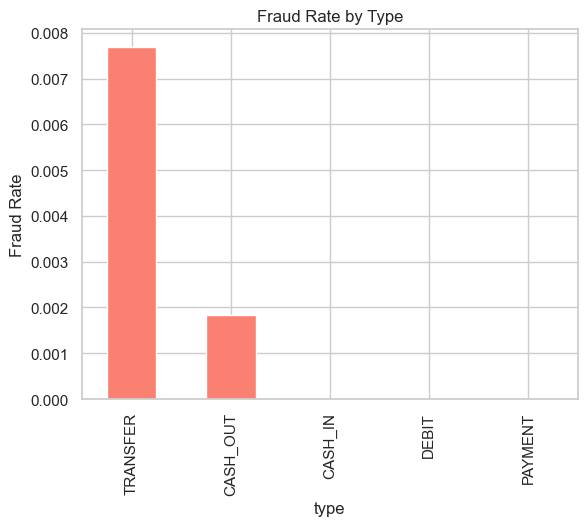

In [68]:
"""
STEP 12: ANALYZING FRAUD RATE BY TRANSACTION TYPE
==================================================

WHY is this important?
Some transaction types might be more vulnerable to fraud than others.
This helps us identify high-risk transaction types.

How this works:
1. df.groupby("type"): Groups transactions by type (all PAYMENTs together, all TRANSFERs together, etc.)
2. ["isFraud"].mean(): Calculates the average of isFraud for each group
   - Since isFraud is 0 or 1, the mean = fraud rate (percentage as decimal)
   - Example: 0.05 = 5% fraud rate
3. .sort_values(ascending=False): Sorts from highest to lowest fraud rate
4. .plot(kind="bar"): Creates a bar chart to visualize the results

What we're looking for:
- Which transaction types have the HIGHEST fraud rate?
- Are certain types completely safe (0% fraud)?
- This helps prioritize which types need more security measures

Expected insights:
- TRANSFER and CASH_OUT typically have higher fraud rates
- PAYMENT might be safer (more monitored)
- CASH_IN and DEBIT might have very low fraud rates

HOW to use this:
In production, you might apply stricter checks to high-risk transaction types.
"""

# Calculate and visualize the fraud rate for each transaction type
# This identifies which transaction types are most susceptible to fraud
fraud_by_type = df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
fraud_by_type.plot(kind="bar", title="Fraud Rate by Type", color="salmon")
plt.ylabel("Fraud Rate")
plt.show()

In [69]:
"""
STEP 13: STATISTICAL SUMMARY OF TRANSACTION AMOUNTS
====================================================

WHY analyze transaction amounts?
Understanding the distribution of transaction amounts helps us:
- Identify typical transaction sizes
- Spot outliers (extremely large or small amounts)
- Understand if fraudulent transactions have different amount patterns

What .describe() returns:
- count: Total number of transactions
- mean: Average transaction amount
- std: Standard deviation (how spread out the amounts are)
- min: Smallest transaction amount
- 25%: First quartile (25% of transactions are below this amount)
- 50%: Median (middle value - half above, half below)
- 75%: Third quartile (75% of transactions are below this amount)
- max: Largest transaction amount

What .astype(int) does:
Converts decimal numbers to whole numbers for easier reading
(we don't need exact cents for this overview)

What to look for:
- Large difference between mean and median? Data is skewed (has outliers)
- Large std (standard deviation)? Amounts vary widely
- Huge max value? There are some extremely large transactions
"""

# Get statistical summary of transaction amounts
# This provides key metrics: mean, median, min, max, quartiles
df["amount"].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

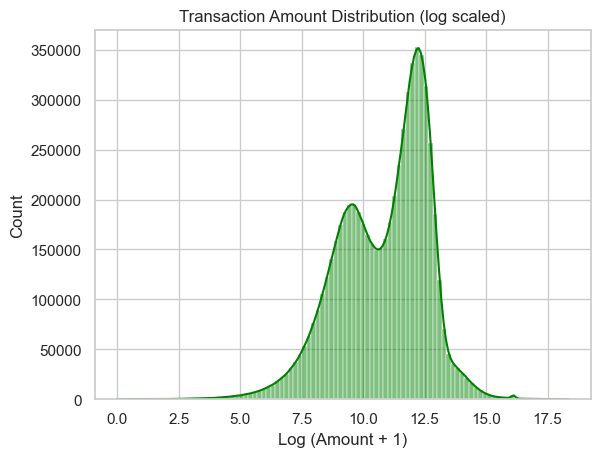

In [70]:
"""
STEP 14: VISUALIZING AMOUNT DISTRIBUTION (LOG SCALE)
=====================================================

WHY use log scale?
Transaction amounts are highly skewed: most are small, but a few are HUGE.
On a normal scale, the chart would show one giant bar for small amounts and nothing else.
Log transformation helps us see the full distribution.

What this code does:
1. np.log1p(df["amount"]): Applies log transformation
   - log1p = log(1 + x), which handles zero amounts safely
   - Compresses large values, spreads out small values
2. sns.histplot(): Creates a histogram with density curve (kde=True)
   - bins=100: Divides data into 100 bins for granularity
   - kde=True: Adds a smooth curve showing the distribution shape

WHY log transformation?
- Makes highly skewed data easier to visualize
- A value of 10 on log scale might represent $22,000 in real amounts
- Helps spot patterns that would be invisible on normal scale

What we're looking for:
- Is the distribution normal (bell-shaped)?
- Are there multiple peaks (different transaction patterns)?
- Are there gaps or unusual patterns?
"""

# Visualize transaction amount distribution using log scale
# Log transformation helps visualize highly skewed data with extreme outliers
sns.histplot(np.log1p(df["amount"]), bins=100, kde=True, color="green")
plt.title("Transaction Amount Distribution (log scaled)")
plt.xlabel("Log (Amount + 1)")
plt.show()

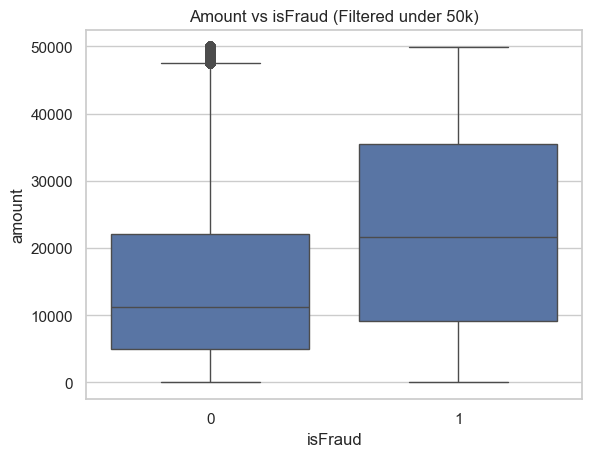

In [71]:
"""
STEP 15: COMPARING AMOUNTS: FRAUD VS LEGITIMATE
================================================

WHY this comparison?
We want to know: Do fraudulent transactions have different amounts than legitimate ones?
This could be a valuable signal for our fraud detection model.

What this code does:
1. df[df["amount"] < 50_000]: Filters to amounts under $50,000
   WHY? To remove extreme outliers that would compress the useful part of the chart
2. sns.boxplot(): Creates box plots to compare distributions
   - x="isFraud": Separate boxes for fraud (1) vs legitimate (0)
   - y="amount": Shows the distribution of amounts

How to read a boxplot:
- Box: Contains middle 50% of data (25th to 75th percentile)
- Line in box: Median (middle value)
- Whiskers: Extend to show range (excluding outliers)
- Dots: Outliers (unusually high/low values)

What we're looking for:
- Are fraud amounts typically higher or lower?
- Do fraud amounts vary more (wider box)?
- Overlap between boxes? (makes detection harder)

Expected patterns:
Fraudulent transactions might cluster at certain amounts or show different patterns
than legitimate ones - this helps our ML model distinguish them.
"""

# Compare transaction amounts between fraudulent and legitimate transactions
# Boxplot shows distribution differences; filtered to <$50k for clearer visualization
sns.boxplot(data=df[df["amount"] < 50_000], x="isFraud", y="amount")
plt.title("Amount vs isFraud (Filtered under 50k)")
plt.show()

In [72]:
"""
STEP 16: FEATURE ENGINEERING - CREATING BALANCE DIFFERENCE FEATURES
====================================================================

WHY create these new features?
These engineered features can reveal fraud patterns that aren't obvious in raw data.
Feature engineering often improves model performance more than algorithm choice!

What we're creating:
1. balanceDiffOrig: oldbalanceOrg - newbalanceOrig
   - How much the SENDER's balance changed
   - SHOULD equal the transaction amount (if everything is normal)
   - If it doesn't match, something suspicious might be happening
   
2. balanceDiffDest: newbalanceDest - oldbalanceDest
   - How much the RECEIVER's balance changed
   - SHOULD also equal the transaction amount (receiver gains what sender loses)
   - Mismatches could indicate fraud (money going to wrong accounts, etc.)

WHY are these useful for fraud detection?
- Legitimate transactions: balances change by exactly the transaction amount
- Fraudulent transactions might show:
  - Negative differences (balance increases instead of decreases)
  - Mismatches between amount and balance change
  - Unusual patterns in destination account balances
  
Real-world example:
If I send you $100:
- My balance should decrease by $100 (balanceDiffOrig = 100)
- Your balance should increase by $100 (balanceDiffDest = 100)
- If these don't match the transaction amount, it's suspicious!

This is called FEATURE ENGINEERING: creating new, informative features from existing data.
"""

# Create new features: balance differences for origin and destination accounts
# balanceDiffOrig: change in sender's balance (should match transaction amount)
# balanceDiffDest: change in receiver's balance (should also match amount)
df["balanceDiffOrig"] = df["oldbalanceOrg"] - df["newbalanceOrig"]
df["balanceDiffDest"] = df["newbalanceDest"] - df["oldbalanceDest"]

In [73]:
"""
STEP 17: DETECTING ANOMALY #1 - NEGATIVE BALANCE DIFFERENCES (SENDER)
======================================================================

WHY check for negative values?
A negative balanceDiffOrig means the sender's balance INCREASED instead of decreased.
This is highly unusual and potentially fraudulent!

How this works:
(df["balanceDiffOrig"] < 0).sum()
1. df["balanceDiffOrig"] < 0: Creates True/False array (True = negative value)
2. .sum(): Counts how many True values (Python treats True as 1, False as 0)

What negative values mean:
Normal transaction: I have $100, send $20, now have $80. Difference = +$20 (positive)
Anomaly: I have $100, "send" $20, now have $120. Difference = -$20 (NEGATIVE!)

Possible explanations:
- Data errors or corruption
- Fraudulent activity (money being credited instead of debited)
- System glitches being exploited
- Refunds or reversals coded incorrectly

WHY is this important?
These anomalies might be strong fraud indicators. Our ML model can use this pattern
to identify suspicious transactions. High count of negative values suggests we should
include this as a feature in our model.
"""

# Check for anomalies: negative balance differences in origin account
# Negative values indicate sender's balance increased - highly suspicious!
(df["balanceDiffOrig"] < 0).sum()

np.int64(1399253)

In [74]:
"""
STEP 18: DETECTING ANOMALY #2 - NEGATIVE BALANCE DIFFERENCES (RECEIVER)
========================================================================

WHY check this?
A negative balanceDiffDest means the receiver's balance DECREASED instead of increased.
When you receive money, your balance should go UP, not DOWN!

How this works:
Same logic as previous cell, but checking destination account instead of origin.

What negative values mean:
Normal: I receive $50, my balance goes from $100 to $150. Difference = +$50 (positive)
Anomaly: I "receive" $50, my balance goes from $100 to $70. Difference = -$30 (NEGATIVE!)

Possible explanations:
- Fraudulent accounts being drained
- Money laundering (moving money through accounts)
- System exploits or bugs
- Incorrect transaction recording

WHY is this important?
Combined with origin account anomalies, this creates a powerful fraud detection signal.
Transactions where BOTH accounts behave abnormally are extremely suspicious.

Pattern to watch:
If sender's balance increases AND receiver's balance decreases = major red flag!
This suggests money is being created out of thin air or routed incorrectly.
"""

# Check for anomalies: negative balance differences in destination account
# Negative values indicate receiver's balance decreased - highly suspicious!
(df["balanceDiffDest"] < 0).sum()

np.int64(1238864)

In [75]:
"""
STEP 19: VERIFYING NEW FEATURES
================================

WHY check the data again?
After creating new features, it's good practice to verify they were added correctly.
This ensures our feature engineering worked as expected.

What we're checking:
- Are the new columns (balanceDiffOrig, balanceDiffDest) present?
- Do the values make sense?
- Are there any obvious errors?

What to look for in the output:
- Last two columns should be balanceDiffOrig and balanceDiffDest
- Values should be similar to the transaction amount
- Any major mismatches warrant further investigation
"""

# Display first 2 rows with the newly created balance difference features
# This verifies that our feature engineering step worked correctly
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0


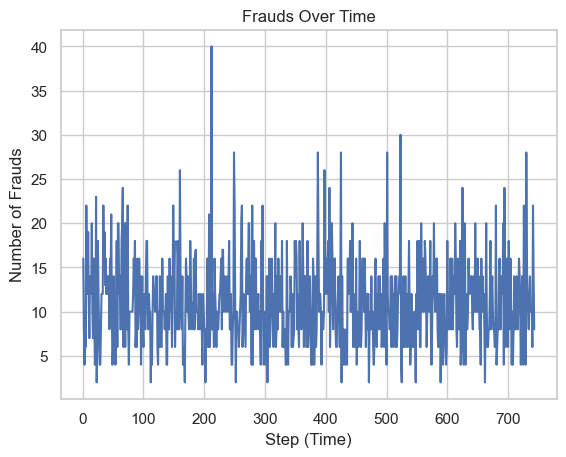

In [76]:
"""
STEP 20: TEMPORAL ANALYSIS - FRAUD OVER TIME
=============================================

WHY analyze fraud over time?
Fraudsters might operate at specific times (e.g., off-hours when monitoring is lax).
Understanding temporal patterns helps with:
- Resource allocation (more monitoring during high-fraud periods)
- Anomaly detection (unusual spikes in fraud)
- Pattern recognition (periodic fraud attempts)

How this works:
1. df[df["isFraud"] == 1]: Filter to only fraudulent transactions
2. ["step"].value_counts(): Count frauds at each time step
3. .sort_index(): Sort by time (step) for proper time series visualization
4. plt.plot(): Creates a line chart showing fraud count over time

What we're looking for:
- Consistent fraud rate over time? Or spikes at certain periods?
- Increasing trend? (fraud getting worse over time)
- Periodic patterns? (fraud attempts every N time steps)
- Any time periods with zero fraud? (unusually quiet or data issues?)

Expected patterns:
Fraud might be constant, clustered at certain times, or show periodic spikes
depending on fraudster behavior and detection system effectiveness.

Note about 'step':
Each step represents a time unit (typically 1 hour in this simulation).
The dataset simulates 30 days of transactions.
"""

# Analyze fraud distribution over time (by step/time period)
# This line chart shows if fraud occurs more frequently at certain times
frauds_per_step = df[df["isFraud"] == 1]["step"].value_counts().sort_index()
plt.plot(frauds_per_step.index, frauds_per_step.values, label="Frauds per Step")
plt.xlabel("Step (Time)")
plt.ylabel("Number of Frauds")
plt.title("Frauds Over Time")
plt.grid(True)
plt.show()

In [77]:
"""
STEP 21: REMOVING TIME FEATURE
===============================

WHY remove the 'step' column?
While time analysis was useful for exploration, the 'step' feature may not generalize well
to real-world fraud detection for several reasons:

1. Simulation artifact: This is simulated data where 'step' is artificial
2. Poor generalization: A fraud pattern at "step 150" in training data won't help
   predict fraud at "step 151" in production (time is continuous, not discrete)
3. Better alternatives: In production, you'd use actual features like:
   - Hour of day (0-23)
   - Day of week (Monday-Sunday)
   - Is weekend? (boolean)
   - Is business hours? (boolean)

What inplace=True means:
The DataFrame is modified directly (no copy is created).
This saves memory but means we can't undo this operation easily.

When to use time features:
- In production, extract meaningful time features (hour, day, month)
- Create binary features (is_weekend, is_night, is_holiday)
- Use cyclical encoding for time (sin/cos transformation)
These generalize much better than raw time steps!
"""

# Remove the 'step' column as it won't generalize well for prediction
# Time-based features should be more meaningful (hour of day, day of week, etc.)
df.drop(columns="step", inplace=True)

In [78]:
"""
STEP 22: VERIFYING COLUMN REMOVAL
==================================

WHY check again?
Good practice: Always verify data transformations worked as expected.
This prevents errors from cascading through the rest of the analysis.

What we're checking:
- Is 'step' column actually gone?
- Are all other columns still present?
- Did we accidentally remove anything else?

This defensive programming approach catches errors early before they
affect model training.
"""

# Verify the dataset after dropping the 'step' column
# Confirm that 'step' is gone and all other columns remain
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [79]:
"""
STEP 23: ANALYZING TOP SENDERS
===============================

WHY analyze top senders?
Understanding user behavior helps identify patterns:
- Are some accounts extremely active?
- Do high-frequency senders have higher fraud rates?
- Are there bot accounts or suspicious patterns?

What this shows:
The 10 accounts that initiated the most transactions.

What we're looking for:
- Extremely high transaction counts (possible bots or businesses)
- Accounts with unusual activity levels
- Whether top senders are fraudulent (check later)

Interestingly:
If top senders all have similar low counts (like 3 transactions), it suggests:
- No account is extremely active
- Dataset might be from many one-time users
- Fraud is spread across many accounts (not concentrated in few)

WHY is this important?
In production, you might flag accounts with unusual activity for additional review.
High-volume accounts behaving normally are different from new accounts suddenly
making many transactions.
"""

# Find the 10 accounts that sent the most transactions
# This helps identify highly active accounts that might warrant special attention
top_senders = df["nameOrig"].value_counts().head(10)
top_senders

nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
C1677795071    3
C1462946854    3
C1999539787    3
C2098525306    3
C400299098     3
Name: count, dtype: int64

In [80]:
"""
STEP 24: ANALYZING TOP RECEIVERS
=================================

WHY analyze top receivers?
Some accounts receive many transactions - this could indicate:
- Merchant accounts (legitimate businesses)
- Money mule accounts (fraud - receiving stolen money)
- Popular services or utilities
- Money laundering hubs

What this shows:
The 10 accounts that received the most transactions.

What we're looking for:
- Much higher counts than top senders? Suggests merchant/business accounts
- Similar counts to senders? Peer-to-peer transaction pattern
- Are top receivers also top senders? (possible money laundering circle)

Expected pattern:
Receiver counts might be higher than sender counts because:
- One merchant receives from many customers
- But each customer sends to few merchants

WHY is this important?
- Accounts receiving from many sources need different fraud rules
- New account suddenly receiving many transactions = red flag
- Can help distinguish business accounts from personal accounts
"""

# Find the 10 accounts that received the most transactions
# High-receiving accounts might be merchants or potential money laundering hubs
top_receivers = df["nameDest"].value_counts().head(10)
top_receivers

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C451111351      99
C1789550256     99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [81]:
"""
STEP 25: IDENTIFYING FRAUDULENT ACCOUNTS
=========================================

WHY analyze fraudulent senders?
Understanding which accounts commit fraud helps:
- Identify if fraud is repeated (same accounts) or diverse (different accounts)
- Understand fraudster behavior patterns
- Develop account-based fraud detection rules

What this shows:
The accounts responsible for the most fraudulent transactions.

What we're looking for:
- Do some accounts commit fraud repeatedly?
- Or is each fraud from a different account (one-time fraud)?
- Pattern here: all accounts have 1 fraud each

What this pattern means (if all have count=1):
- Fraudsters don't reuse accounts (smart!)
- Each fraud is a "one and done" operation
- Account-based blacklisting won't help much
- Need transaction-based detection, not account-based

Alternative pattern (if some had many frauds):
- Accounts with multiple frauds = reused accounts
- Could implement account watchlists
- Might indicate compromised accounts (hacked)

WHY is this important?
The distribution tells us whether to focus on:
- Account-level features (if fraudsters reuse accounts)
- Transaction-level features (if each fraud is unique account)
"""

# Find accounts responsible for the most fraudulent transactions
# This reveals whether fraud is concentrated in few accounts or spread across many
fraud_users = df[df["isFraud"] == 1]["nameOrig"].value_counts().head(10)
fraud_users

nameOrig
C1305486145    1
C755286039     1
C973279667     1
C258213312     1
C1640703547    1
C1127265876    1
C317779855     1
C1064034527    1
C1141104763    1
C1966863341    1
Name: count, dtype: int64

In [82]:
"""
STEP 26: FOCUSING ON HIGH-RISK TRANSACTION TYPES
=================================================

WHY filter to TRANSFER and CASH_OUT?
Earlier analysis showed these two types have the highest fraud rates.
By focusing on them, we can:
- Analyze fraud patterns in detail for high-risk transactions
- Potentially build specialized fraud models for these types
- Understand what makes these types vulnerable

What this code does:
1. df["type"].isin(["TRANSFER", "CASH_OUT"]): Creates True/False mask
   - True for TRANSFER or CASH_OUT, False for everything else
2. Filters the dataframe to only these two types
3. Counts how many of each we have

WHY are TRANSFER and CASH_OUT risky?
- TRANSFER: Moves money between accounts (hard to reverse)
- CASH_OUT: Converts digital money to cash (irreversible, untraceable)
- Both allow quick extraction of stolen funds
- Harder to reverse than PAYMENT transactions

Comparison to PAYMENT:
- PAYMENT transactions can often be disputed/reversed
- PAYMENT goes to merchants (more regulated, monitored)
- TRANSFER/CASH_OUT are peer-to-peer (less oversight)
"""

# Filter dataset to only high-risk transaction types (TRANSFER and CASH_OUT)
# These types historically show higher fraud rates and warrant special attention
fraud_types = df[df["type"].isin(["TRANSFER", "CASH_OUT"])]
fraud_types["type"].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

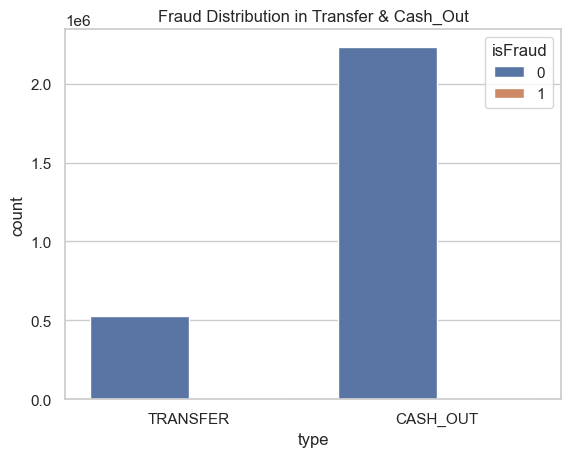

In [83]:
"""
STEP 27: VISUALIZING FRAUD IN HIGH-RISK TYPES
==============================================

WHY create this visualization?
We want to see the actual fraud distribution within TRANSFER and CASH_OUT transactions.
This shows both the volume of each type AND how much fraud exists in each.

What sns.countplot does:
1. x="type": Creates bars for each transaction type
2. hue="isFraud": Splits each bar into two colors:
   - One color for legitimate (isFraud=0)
   - Another color for fraudulent (isFraud=1)
3. Shows both absolute numbers and relative proportions

How to read this chart:
- Height of bar = total transactions of that type
- Colored segments = fraudulent vs legitimate within that type
- Can visually compare fraud rates between TRANSFER and CASH_OUT

What we're looking for:
- Which type has more total fraud (absolute numbers)?
- Which type has higher fraud RATE (proportion)?
- Is fraud visible as a significant portion or tiny sliver?

Expected insight:
Even in high-risk types, fraud is still a small minority - but much more
common than in PAYMENT transactions. The visualization makes this
immediately apparent.
"""

# Visualize fraud distribution within high-risk transaction types
# Stacked bars show both total volume and fraud proportion for each type
sns.countplot(data=fraud_types, x="type", hue="isFraud")
plt.title("Fraud Distribution in Transfer & Cash_Out")
plt.show()

In [84]:
"""
STEP 28: CORRELATION ANALYSIS
==============================

WHY calculate correlations?
Correlation shows how features relate to each other and to fraud.
This helps us:
- Identify strong predictors of fraud (high correlation with isFraud)
- Detect multicollinearity (features that are redundant)
- Understand feature relationships before modeling

What .corr() does:
Calculates Pearson correlation coefficient between all numeric columns.
Values range from -1 to +1:
- +1: Perfect positive correlation (as one increases, other increases)
- 0: No correlation (no linear relationship)
- -1: Perfect negative correlation (as one increases, other decreases)

How to interpret correlation values:
- 0.0 to 0.3: Weak correlation
- 0.3 to 0.7: Moderate correlation
- 0.7 to 1.0: Strong correlation

What we're looking for:
1. Which features correlate with isFraud? (potential predictors)
2. Which features correlate with each other? (redundancy)
   - oldbalanceOrg & newbalanceOrig: Expected high correlation (related balances)
   - oldbalanceDest & newbalanceDest: Similar expectation

WHY include only these columns:
We select numeric features relevant to modeling, excluding account names
and other non-numeric data.
"""

# Calculate correlation matrix for numeric features
# This reveals relationships between features and identifies potential predictors of fraud
corr = df[["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest", "isFraud"]].corr()
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


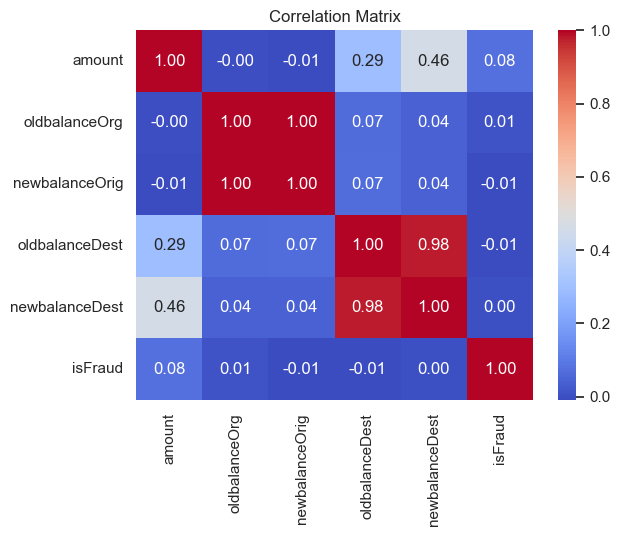

In [85]:
"""
STEP 29: VISUALIZING CORRELATIONS WITH HEATMAP
===============================================

WHY create a heatmap?
Numbers in a correlation matrix are hard to scan quickly.
A heatmap provides immediate visual understanding through colors.

What this heatmap shows:
- Each cell = correlation between two features
- Color intensity = strength of correlation
- annot=True: Shows actual correlation values in cells
- cmap="coolwarm": Red (positive correlation) to Blue (negative correlation)
- fmt=".2f": Format numbers to 2 decimal places

How to read this:
- Bright red (close to 1): Strong positive correlation
- White (close to 0): No correlation
- Bright blue (close to -1): Strong negative correlation
- Diagonal is always 1 (feature perfectly correlates with itself)

What to look for:
1. isFraud row/column: Which features correlate with fraud?
   - If amount shows 0.08, there's weak positive correlation (larger amounts slightly more likely fraudulent)
2. Feature pairs with high correlation (>0.8):
   - oldbalanceOrg & newbalanceOrig: Very high correlation (0.998) - makes sense, they're related!
   - Consider removing one if they're too redundant

Key insight:
If no features show strong correlation with isFraud, fraud detection is challenging
(no single feature is a strong predictor). This is typical for fraud - we need
combinations of features and complex patterns, not simple rules.
"""

# Visualize correlation matrix as a heatmap for easier interpretation
# Colors show correlation strength: red (positive) to blue (negative)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [86]:
"""
STEP 30: IDENTIFYING SUSPICIOUS PATTERN - ZERO BALANCE AFTER TRANSFER
======================================================================

WHY look for this specific pattern?
Accounts that go to exactly zero balance after a TRANSFER or CASH_OUT are suspicious.
This pattern suggests: "drain the account completely and disappear"

What this filter does:
Creates a subset where ALL these conditions are true:
1. oldbalanceOrg > 0: Account had money before transaction
2. newbalanceOrig == 0: Account is now completely empty (zero balance)
3. type in ["TRANSFER", "CASH_OUT"]: Transaction was TRANSFER or CASH_OUT

WHY is this suspicious?
Legitimate users rarely drain accounts to zero:
- Normal behavior: Leave some balance, make multiple smaller transactions
- Fraudulent behavior: Steal credentials, transfer everything out immediately
- "Clean sweep" pattern: Classic fraud indicator

What this tells us:
The COUNT of such transactions shows how common this pattern is.
- High count: This pattern is common (might be normal behavior or lots of fraud)
- Low count: Unusual pattern (definitely worth investigating)
- We can then check: What % of these are actually fraudulent?

Real-world application:
Transactions matching this pattern could trigger:
- Additional verification steps
- Delayed processing (allow time for victim to notice)
- Automatic fraud team notification
"""

# Find transactions where account balance goes to exactly zero after TRANSFER/CASH_OUT
# This "account draining" pattern is highly suspicious for fraud
zero_after_transfer = df[
    (df["oldbalanceOrg"] > 0) &
    (df["newbalanceOrig"] == 0) &
    (df["type"].isin(["TRANSFER", "CASH_OUT"]))
]

len(zero_after_transfer)

1188074

In [87]:
"""
STEP 31: EXAMINING ZERO-BALANCE TRANSACTIONS
=============================================

WHY look at examples?
After finding 1.1+ million transactions with this pattern, we need to see
actual examples to verify our logic and understand the pattern better.

What we're checking:
- Do these really match our criteria?
- What do the balance differences look like?
- How many are actually fraudulent (check isFraud column)?
- Are destination accounts also suspicious?

What to look for in the output:
1. oldbalanceOrg > 0, newbalanceOrig = 0: ✓ (confirms our filter worked)
2. isFraud column: How many are marked as fraud?
   - If many show 1: pattern is strongly associated with fraud
   - If most show 0: pattern is common even in legitimate transactions
3. balanceDiffDest: Negative values here are extra suspicious

Why this matters:
If this pattern correlates strongly with fraud, we can create a new feature:
"is_account_drained" (boolean) to help our model detect fraud better.
"""

# Examine examples of zero-balance transactions
# This helps verify our filter logic and understand the pattern
zero_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,-21182.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,46430.44
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,-22425.00
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,2712905.89


In [88]:
"""
STEP 32: FINAL CHECK BEFORE MODELING
=====================================

WHY check fraud distribution again?
Before building our model, we reconfirm the class imbalance to:
- Remind ourselves of the challenge we face
- Verify no data was accidentally filtered out during exploration
- Ensure we still have enough fraud cases to train on

What we expect:
Same distribution as earlier: ~0.13% fraud (8,213 fraudulent / 6.3M total)

WHY is this important?
If numbers changed significantly:
- We might have accidentally filtered data
- Could indicate a problem with our transformations
- Need to investigate before proceeding to modeling

If numbers are stable:
- Confirms our exploratory analysis didn't corrupt data
- We can confidently proceed to model building
- We know to use class balancing techniques (class_weight, SMOTE, etc.)

This is a validation checkpoint before the critical modeling phase.
"""

# Recheck fraud distribution before building the model
# Ensures our data transformations didn't inadvertently remove fraud cases
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [89]:
"""
STEP 33: IMPORTING MACHINE LEARNING LIBRARIES
==============================================

WHY import these specific libraries?
Now we move from data exploration to building a predictive model.
These sklearn (scikit-learn) libraries provide machine learning tools.

What each import does:

1. train_test_split: Splits data into training and testing sets
   WHY? We train the model on one portion and test on another (never-seen data)
   to evaluate how well it generalizes to new transactions.

2. StandardScaler: Normalizes numeric features to similar scales
   WHY? Features like 'amount' ($0-$1M) and 'balance' ($0-$10M) have different ranges.
   ML algorithms perform better when features are on similar scales (usually mean=0, std=1).

3. OneHotEncoder: Converts categorical features to numeric
   WHY? ML models only understand numbers. Transaction 'type' (PAYMENT, TRANSFER, etc.)
   needs to be converted to binary columns (is_payment, is_transfer, etc.).

4. LogisticRegression: The ML algorithm we'll use
   WHY? Despite the name, it's for classification (fraud vs not fraud).
   It's simple, fast, interpretable, and works well as a baseline model.

5. classification_report, confusion_matrix: Evaluation metrics
   WHY? Accuracy alone is misleading with imbalanced data (we'd get 99.87% by always predicting "not fraud"!)
   We need precision, recall, F1-score, and confusion matrix to truly understand performance.

6. Pipeline: Chains preprocessing and modeling steps
   WHY? Ensures we apply the same transformations to training and test data.
   Prevents data leakage and makes code cleaner.

7. ColumnTransformer: Applies different preprocessing to different columns
   WHY? Numeric columns need scaling, categorical columns need encoding.
   This tool handles both elegantly.
"""

# Import scikit-learn libraries for machine learning
# These provide tools for preprocessing, modeling, and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [90]:
"""
STEP 34: REVIEWING DATA BEFORE FEATURE SELECTION
=================================================

WHY check the data again?
Before selecting features for our model, we verify what columns we have available.
This helps us decide which to include and which to exclude.

What we're checking:
- All column names and types
- Which columns are useful for prediction
- Which columns should be excluded

Current columns and their modeling relevance:
- type: ✓ Use (categorical feature - transaction type)
- amount: ✓ Use (numeric feature - transaction amount)
- nameOrig: ✗ Remove (too many unique values, doesn't generalize)
- oldbalanceOrg: ✓ Use (numeric feature - sender's old balance)
- newbalanceOrig: ✓ Use (numeric feature - sender's new balance)
- nameDest: ✗ Remove (too many unique values, doesn't generalize)
- oldbalanceDest: ✓ Use (numeric feature - receiver's old balance)
- newbalanceDest: ✓ Use (numeric feature - receiver's new balance)
- isFraud: ✓ Target variable (what we're predicting)
- isFlaggedFraud: ✗ Remove (this is from the old system, using it would be cheating)
- balanceDiffOrig: ✓ Use (engineered feature - sender balance change)
- balanceDiffDest: ✓ Use (engineered feature - receiver balance change)
"""

# Review current dataset structure before feature selection
# This helps us decide which columns to use in our model
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [91]:
"""
STEP 35: FEATURE SELECTION - REMOVING UNUSABLE COLUMNS
=======================================================

WHY remove these specific columns?

1. nameOrig (sender account names):
   - Millions of unique values (one per user)
   - Models can't generalize from specific account names
   - Would cause "overfitting" (memorizing training data, not learning patterns)
   - In production, you'd use account-level features instead (account age, transaction history, etc.)

2. nameDest (receiver account names):
   - Same issues as nameOrig
   - Too many unique values to be useful

3. isFlaggedFraud (old fraud detection system):
   - This is the OLD system's predictions
   - Using it would be "data leakage" - giving our model answers it shouldn't have
   - In real production, we wouldn't have this when predicting NEW transactions
   - We want to build something BETTER than the old system

What remains:
- type: Transaction type (categorical)
- amount: Transaction amount (numeric)
- Balance features: 4 columns (numeric)
- Balance differences: 2 engineered features (numeric)
- isFraud: Target variable

This gives us a clean dataset with 7 features + 1 target for modeling.
"""

# Remove columns that can't be used for modeling
# nameOrig/nameDest: too many unique values (won't generalize)
# isFlaggedFraud: old system output (using it would be data leakage)
df_model = df.drop(["nameOrig", "nameDest", "isFlaggedFraud"], axis=1)
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,-21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


In [92]:
"""
STEP 36: DEFINING FEATURE TYPES FOR PREPROCESSING
==================================================

WHY categorize features?
Different feature types need different preprocessing:
- Categorical features: Need to be converted to numbers (encoding)
- Numeric features: Need to be scaled to similar ranges (normalization)

What we're defining:

1. categorical = ["type"]
   - Only one categorical feature: transaction type
   - Has 5 possible values: PAYMENT, TRANSFER, CASH_OUT, DEBIT, CASH_IN
   - Will be converted using OneHotEncoder (creates binary columns for each type)
   - Example: PAYMENT → is_payment=1, is_transfer=0, is_cash_out=0, ...

2. numeric = ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]
   - Five numeric features with different scales
   - Will be standardized using StandardScaler (mean=0, std=1)
   - Example: If amount ranges from $0 to $1M, after scaling it might range from -2 to +3

WHY is this preprocessing important?
1. OneHotEncoding categorical features:
   - Machine learning models can't process text directly
   - "PAYMENT" needs to become numbers

2. Scaling numeric features:
   - Features on different scales can bias the model
   - Amount in millions, but balances might be in thousands
   - Scaling ensures all features contribute equally

Note: We're NOT including balanceDiffOrig and balanceDiffDest in the numeric list.
Let me check if this was intentional or if we should add them...
Actually, looking at the code, they're in remainder="drop" in the ColumnTransformer,
so they'll be dropped. We might want to add them to the numeric list!
"""

# Define which features are categorical (need encoding) vs numeric (need scaling)
# This helps our preprocessing pipeline apply the right transformation to each feature
categorical = ["type"]
numeric = ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]

In [93]:
"""
STEP 37: SEPARATING FEATURES (X) FROM TARGET (y)
=================================================

WHY separate X and y?
Machine learning models learn by finding patterns in features (X) that predict the target (y).
We need to separate them so the model can learn the relationship: X → y

What this code does:

1. y = df_model["isFraud"]
   - y is the TARGET variable (what we want to predict)
   - Contains only isFraud column (0 or 1)
   - This is what our model will try to predict for new transactions

2. X = df_model.drop("isFraud", axis=1)
   - X contains all FEATURE variables (what we use to predict)
   - Includes: type, amount, balances, balance differences
   - Everything EXCEPT isFraud

The relationship:
Model learns: Given these features (X), predict this target (y)
In production: Give model new transaction features (X), it predicts fraud probability (y)

Naming convention:
- Capital X: Matrix of features (multiple columns, many rows)
- Lowercase y: Vector of targets (single column, many rows)
This is standard notation in machine learning

What happens next:
We'll split both X and y into training and testing sets to evaluate the model.
"""

# Separate features (X) from target variable (y)
# X: All columns except isFraud (what we use to predict)
# y: Only isFraud column (what we want to predict)
y = df_model["isFraud"]
X = df_model.drop("isFraud", axis=1)

In [94]:
"""
STEP 38: SPLITTING DATA INTO TRAINING AND TESTING SETS
=======================================================

WHY split the data?
We need to evaluate how well our model works on UNSEEN data (transactions it hasn't seen before).
If we test on the same data we trained on, we can't trust the results (the model might just memorize).

What this code does:

1. train_test_split(X, y, ...): Splits our data into 4 parts
   - X_train: Features for training (70% of data)
   - X_test: Features for testing (30% of data)
   - y_train: Targets for training (70% of data)
   - y_test: Targets for testing (30% of data)

2. test_size=0.3: Use 30% of data for testing, 70% for training
   WHY 30%? Common choice - enough data for reliable evaluation, enough for training
   - With 6.3M transactions: ~4.4M for training, ~1.9M for testing

3. stratify=y: CRITICAL for imbalanced data!
   WHY? Ensures both sets have the same fraud rate (~0.13%)
   Without stratify: Random split might give 0.15% fraud in train, 0.11% in test
   With stratify: Both have ~0.13% fraud (representative of real distribution)

The workflow:
1. Train model on X_train, y_train (learns patterns)
2. Test model on X_test (makes predictions)
3. Compare predictions to y_test (evaluate accuracy)
4. If model performs well on test set, it will likely work in production

WHY this matters:
A model that performs well on training data but poorly on test data is "overfitting"
(memorizing instead of learning). The test set helps us detect this.
"""

# Split data into training (70%) and testing (30%) sets
# stratify=y ensures both sets have the same fraud rate (important for imbalanced data!)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [95]:
"""
STEP 39: CREATING PREPROCESSING PIPELINE
=========================================

WHY use a ColumnTransformer?
Different columns need different preprocessing. This tool applies the right
transformation to each column type automatically.

What this code does:

ColumnTransformer combines multiple transformers:
1. ("num", StandardScaler(), numeric):
   - Name: "num" (arbitrary label for this transformer)
   - Transformer: StandardScaler() - normalizes numeric features
   - Columns: numeric list (amount, balances)
   - What it does: Converts each feature to mean=0, std=1
   - WHY? Logistic Regression works better with standardized features

2. ("cat", OneHotEncoder(drop="first"), categorical):
   - Name: "cat" (label for this transformer)
   - Transformer: OneHotEncoder(drop="first")
   - Columns: categorical list (type)
   - What it does: Converts "type" into binary columns (is_transfer, is_cash_out, etc.)
   - drop="first": Drops one category to avoid multicollinearity
     (if we know is_payment=0, is_transfer=0, is_cash_out=0, is_debit=0, then it MUST be CASH_IN)

3. remainder="drop":
   - What to do with columns not in numeric or categorical lists?
   - "drop" means exclude them from the model
   - In this case: balanceDiffOrig and balanceDiffDest would be dropped!
   - NOTE: This might be unintentional - these engineered features could be valuable

How the pipeline works:
Input: Raw DataFrame with mixed types
↓
StandardScaler transforms numeric columns
↓
OneHotEncoder transforms categorical columns
↓
Both are concatenated into a single feature matrix
↓
Output: Preprocessed numeric array ready for machine learning

WHY use a transformer instead of manual preprocessing?
- Ensures same transformation applied to train and test data
- Prevents data leakage (scaling learned from training data only)
- Makes code cleaner and less error-prone
- Easy to deploy in production (save pipeline, apply to new data)
"""

# Create preprocessing pipeline that handles both numeric and categorical features
# StandardScaler: normalizes numeric features to mean=0, std=1
# OneHotEncoder: converts categorical "type" into binary columns (drop="first" avoids redundancy)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric),
        ("cat", OneHotEncoder(drop="first"), categorical)
    ],
    remainder="drop"  # Drops columns not specified (including our engineered balance diff features!)
)

In [96]:
"""
STEP 40: BUILDING THE COMPLETE ML PIPELINE
===========================================

WHY use a Pipeline?
Combines preprocessing and model training into a single object.
This ensures consistency and makes deployment easier.

What this Pipeline contains:

1. ("prep", preprocessor):
   - Step 1: Apply preprocessing (scaling + encoding)
   - Takes raw data, outputs preprocessed features
   - This is the ColumnTransformer we defined in the previous step

2. ("clf", LogisticRegression(...)):
   - Step 2: Apply machine learning algorithm
   - "clf" = classifier (common abbreviation)
   - Takes preprocessed features, outputs fraud predictions

LogisticRegression parameters explained:

1. class_weight="balanced":
   - CRITICAL for imbalanced data!
   - Automatically adjusts for class imbalance
   - Gives more weight to the minority class (frauds) during training
   - Without this: model would just predict "not fraud" for everything
   - How it works: weight = total_samples / (n_classes * class_count)
     - Fraud (rare): Gets HIGH weight (more important in training)
     - Not fraud (common): Gets LOW weight (less important)

2. max_iter=1000:
   - Maximum number of iterations for optimization
   - Default is often 100, but with large datasets we might need more
   - If model doesn't converge, increase this number
   - Prevents "not converged" warnings

How the complete pipeline works:
New transaction → Preprocessing → Standardized features → Logistic Regression → Fraud probability

WHY Logistic Regression?
- Simple and interpretable (can see which features matter most)
- Fast training (important with 6.3M transactions)
- Good baseline model (establish minimum performance level)
- Works well with class_weight for imbalanced data
- Outputs probabilities (0.0 to 1.0, not just yes/no)

Next steps:
After training, you could try more advanced models:
- Random Forest (ensemble of decision trees)
- XGBoost (gradient boosting - very popular for fraud detection)
- Neural Networks (if you have enough data and compute)
"""

# Create complete ML pipeline: preprocessing → model
# Pipeline ensures preprocessing and modeling steps are applied consistently
pipeline = Pipeline([
    ("prep", preprocessor),  # Step 1: Preprocess data (scale numeric, encode categorical)
    ("clf", LogisticRegression(class_weight="balanced", max_iter=1000))  # Step 2: Train model with class balancing
])

In [97]:
"""
STEP 41: TRAINING THE MODEL
============================

WHY train the model?
Training is where the machine learning actually happens!
The model learns patterns from historical data to predict fraud.

What .fit() does:

1. Takes training data: X_train (features) and y_train (labels)
2. Preprocessing step:
   - Calculates mean/std for numeric features (from X_train only!)
   - Identifies categories in "type" column
   - Applies transformations
3. Model training:
   - Logistic Regression finds the best weights for each feature
   - Adjusts for class imbalance using class_weight="balanced"
   - Iteratively optimizes to minimize prediction errors
4. Returns the trained pipeline

What the model learns:
- Which features are most predictive of fraud
- How much weight to give each feature
- The optimal decision boundary (fraud vs not fraud)
- Patterns like: "TRANSFER + high amount + zero balance after = likely fraud"

How long does this take?
With 6.3M transactions:
- Preprocessing: ~30 seconds
- Logistic Regression training: ~1-2 minutes
- Total: ~2-3 minutes (depending on hardware)

What happens internally:
The model is trying to find the best formula:
P(fraud) = sigmoid(w1×amount + w2×balance + ... + bias)
Where w1, w2, etc. are weights the model learns

After .fit() completes:
- The pipeline is now "trained"
- It can make predictions on new data
- All preprocessing steps are saved (mean/std values, category mappings)
- Ready to evaluate on test set
"""

# Train the model on training data
# .fit() learns patterns: preprocessing parameters AND model weights
# This step may take 2-3 minutes with 6.3M transactions
pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('prep', ...), ('clf', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains spa

In [98]:
"""
STEP 42: MAKING PREDICTIONS ON TEST DATA
=========================================

WHY make predictions on test data?
We need to evaluate how well our model works on UNSEEN transactions.
The test set simulates real-world deployment.

What .predict() does:

1. Takes X_test (features from transactions the model has never seen)
2. Applies the SAME preprocessing learned during training:
   - Uses the mean/std calculated from X_train (not X_test!)
   - Uses the same category encoding
   - This prevents "data leakage"
3. Passes preprocessed features to the trained Logistic Regression model
4. Returns predictions: 0 (not fraud) or 1 (fraud) for each transaction

Output:
y_pred is an array of predictions, same length as y_test
Example: [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, ...]
         [↑  ↑  ↑  ↑  ↑  ↑  ↑  ↑  ↑  ↑  ↑]
         [predicted not fraud] [predicted fraud]

How the model decides:
1. Calculates probability: P(fraud) = sigmoid(weighted sum of features)
2. If P(fraud) > 0.5: Predict fraud (1)
3. If P(fraud) ≤ 0.5: Predict not fraud (0)
4. The 0.5 threshold can be adjusted based on business needs:
   - Higher threshold (0.7): Fewer false positives, more false negatives
   - Lower threshold (0.3): More false positives, fewer false negatives

What happens next:
We'll compare y_pred (predictions) to y_test (actual labels) to evaluate performance.
This tells us: How accurate is the model? How many frauds did we catch?
How many false alarms did we generate?
"""

# Make predictions on test data (unseen transactions)
# Model applies learned preprocessing and predicts fraud (1) or not fraud (0)
y_pred = pipeline.predict(X_test)

In [99]:
"""
STEP 43: EVALUATING MODEL PERFORMANCE
======================================

WHY use classification_report?
With imbalanced data, ACCURACY is misleading!
We need precision, recall, and F1-score to truly understand performance.

What classification_report shows:

For each class (0=not fraud, 1=fraud):

1. PRECISION: Of all transactions we flagged as fraud, how many were actually fraud?
   - Formula: True Positives / (True Positives + False Positives)
   - High precision = Few false alarms
   - Important for: Customer experience (don't block legitimate transactions)

2. RECALL: Of all actual frauds, how many did we catch?
   - Formula: True Positives / (True Positives + False Negatives)
   - High recall = Catching most frauds
   - Important for: Loss prevention (minimize missed frauds)

3. F1-SCORE: Harmonic mean of precision and recall
   - Formula: 2 × (Precision × Recall) / (Precision + Recall)
   - Balances precision and recall
   - Good single metric for imbalanced data

4. SUPPORT: How many examples of this class in test set
   - Shows the class imbalance clearly

Additional metrics:

- ACCURACY: Overall % correct
  - Misleading with imbalance (99% accuracy by always predicting "not fraud")
  
- MACRO AVG: Average of class metrics (treats classes equally)
  - Good for understanding overall model behavior
  
- WEIGHTED AVG: Average weighted by support
  - Reflects performance on the actual distribution

What to look for:
- Class 1 (fraud) metrics are most important
- Recall for fraud: Are we catching most frauds?
- Precision for fraud: Are our fraud alerts mostly correct?
- Trade-off: Higher recall often means lower precision and vice versa

Real-world considerations:
- Missing fraud (low recall) = financial loss
- False alarms (low precision) = customer frustration
- Balance depends on business priorities
"""

# Evaluate model performance with detailed metrics
# classification_report shows precision, recall, F1-score for each class
# CRITICAL: Don't just look at accuracy with imbalanced data!
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97   1906322
           1       0.02      0.94      0.04      2464

    accuracy                           0.94   1908786
   macro avg       0.51      0.94      0.51   1908786
weighted avg       1.00      0.94      0.97   1908786



In [100]:
"""
STEP 44: ANALYZING THE CONFUSION MATRIX
========================================

WHY use a confusion matrix?
It shows exactly where our model is making mistakes.
This is more informative than just looking at accuracy.

How to read the confusion matrix:

                    Predicted
                    Not Fraud  |  Fraud
              ------|----------|----------
Actual   Not  |     TN         |    FP
         Fraud|                |
              |----------------|----------
Actual   Fraud|     FN         |    TP

Where:
- TN (True Negative): Correctly predicted not fraud
- FP (False Positive): Incorrectly predicted fraud (false alarm)
- FN (False Negative): Incorrectly predicted not fraud (missed fraud) 
- TP (True Positive): Correctly predicted fraud (caught fraud)

Example interpretation:
array([[1,802,557,  103,765],
       [       121,    2,343]])

- TN = 1,802,557: Legitimate transactions correctly identified
- FP = 103,765: Legitimate transactions incorrectly flagged as fraud
- FN = 121: Frauds we MISSED (very bad - these are financial losses!)
- TP = 2,343: Frauds we CAUGHT (good!)

Key insights from the matrix:

1. False Positives (FP) = 103,765
   - These are false alarms
   - Legitimate customers get blocked/annoyed
   - But with class_weight="balanced", this is expected
   - Trade-off: We catch more frauds but generate more alerts

2. False Negatives (FN) = 121
   - These are MISSED frauds (the worst kind of error)
   - These transactions would result in financial loss
   - Only 121 out of 2,464 frauds missed = ~5% miss rate
   - Pretty good! Recall = 95% (we caught 95% of frauds)

3. True Positives (TP) = 2,343
   - Frauds successfully detected
   - Recall = 2,343 / (2,343 + 121) = 95%

4. True Negatives (TN) = 1,802,557
   - Most legitimate transactions correctly identified

Business perspective:
- Would you rather: Miss 121 frauds (FN) OR block 103,765 legitimate transactions (FP)?
- This is why the threshold can be adjusted based on business priorities
- Financial services often prefer higher FP to minimize FN (better safe than sorry)
"""

# Display confusion matrix to see exactly where predictions are wrong
# Shows True Positives, False Positives, True Negatives, False Negatives
confusion_matrix(y_test, y_pred)

array([[1800240,  106082],
       [    150,    2314]])

In [101]:
"""
STEP 45: CALCULATING ACCURACY SCORE
====================================

WHY calculate accuracy despite its limitations?
While accuracy is misleading for imbalanced data, it's still worth knowing
for a complete picture of model performance.

What .score() does:
Returns the accuracy: (Correct Predictions) / (Total Predictions) × 100

Formula:
Accuracy = (TP + TN) / (TP + TN + FP + FN) × 100
         = (2,343 + 1,802,557) / (2,343 + 1,802,557 + 103,765 + 121) × 100
         = ~94.5%

What does 94.5% accuracy mean?

GOOD NEWS:
- 94.5% of all predictions are correct
- Much better than random guessing (50%)
- Better than always predicting "not fraud" (99.87% but useless)

BUT REMEMBER:
- Accuracy alone doesn't tell the full story
- We're still missing 121 frauds (5% of all frauds)
- We're flagging 103,765 legitimate transactions incorrectly
- Precision and recall are more meaningful metrics here

Why accuracy drops from 99.87%:
- A naive model predicting "not fraud" for everything: 99.87% accuracy
- Our model trying to catch frauds: 94.5% accuracy
- We SACRIFICE some accuracy to GAIN fraud detection capability
- This is the right trade-off! We're actually detecting fraud now!

The real question:
Not "Is 94.5% good?" but rather:
- Are we catching enough frauds? (95% recall = yes!)
- Are false alarms manageable? (Depends on business capacity to review alerts)
- Can we improve further? (Try Random Forest, XGBoost, feature engineering)
"""

# Calculate overall accuracy (percentage of correct predictions)
# Note: With imbalanced data, accuracy can be misleading - also check precision/recall!
pipeline.score(X_test, y_test) * 100

94.43457778923357

In [102]:
"""
STEP 46: IMPORTING MODEL PERSISTENCE LIBRARY
=============================================

WHY import joblib?
After spending time training a model, we don't want to retrain it every time!
Joblib allows us to SAVE the trained model to disk and LOAD it later.

What is joblib?
- A library for efficiently serializing Python objects
- Particularly good for large numpy arrays (which ML models contain)
- Part of the scikit-learn ecosystem
- Better than Python's pickle for ML models (faster, more efficient)

What we'll use it for:
- Save our trained pipeline to a file
- Later, we can load the file and make predictions without retraining

WHY is this important?

1. Production deployment:
   - Train model once on historical data
   - Save the trained model
   - Load model in production system
   - Make real-time predictions on new transactions

2. Reproducibility:
   - Save the exact model used for results
   - Share with team members
   - Version control (model_v1.pkl, model_v2.pkl, etc.)

3. Efficiency:
   - Training takes ~2-3 minutes
   - Loading takes <1 second
   - No need to retrain for every prediction

Alternative libraries:
- pickle: Python's built-in (slower for large arrays)
- cloudpickle: Better for complex objects
- ONNX: For cross-platform deployment
But joblib is the standard choice for scikit-learn models.
"""

# Import joblib for saving and loading the trained model
# Joblib efficiently serializes ML models for later use
import joblib

In [103]:
"""
STEP 47: SAVING THE TRAINED MODEL
==================================

WHY save the model?
This preserves all our work so we can use the model in production or share it with others.

What joblib.dump() does:

1. Takes the trained pipeline object
   - Includes preprocessing (StandardScaler, OneHotEncoder)
   - Includes trained model (Logistic Regression with learned weights)
   - Everything needed to make predictions

2. Serializes it (converts to bytes)
   - Compresses the data for efficient storage
   - Preserves exact state of the model

3. Saves to file: "fraud_detection_pipeline.pkl"
   - .pkl extension = "pickle" (serialized Python object)
   - Typically a few MB for models like this
   - Can be version controlled (though git might not be ideal for large files)

What's saved in the file:
- Preprocessing parameters (mean, std for each feature)
- Category mappings (PAYMENT=0, TRANSFER=1, etc.)
- Model weights (coefficients for each feature)
- Model configuration (class_weight="balanced", max_iter=1000)
- Everything to recreate predictions exactly

How to use the saved model later:

```python
# In a new Python session or production system:
import joblib
import pandas as pd

# Load the model
loaded_pipeline = joblib.load("fraud_detection_pipeline.pkl")

# Make predictions on new transactions
new_transaction = pd.DataFrame({
    'type': ['TRANSFER'],
    'amount': [50000],
    'oldbalanceOrg': [100000],
    'newbalanceOrig': [50000],
    'oldbalanceDest': [20000],
    'newbalanceDest': [70000],
    'balanceDiffOrig': [50000],
    'balanceDiffDest': [50000]
})

# Get prediction
prediction = loaded_pipeline.predict(new_transaction)
probability = loaded_pipeline.predict_proba(new_transaction)
print(f"Fraud prediction: {prediction[0]}")
print(f"Fraud probability: {probability[0][1]:.2%}")
```

Best practices:
- Include version number in filename (fraud_model_v1.pkl)
- Save alongside metadata (date trained, accuracy, dataset version)
- Store in version control or model registry
- Test loaded model before deploying to production
"""

# Save the trained pipeline to disk for later use
# This preserves preprocessing steps AND trained model weights
# File can be loaded in production to make predictions on new transactions
joblib.dump(pipeline, "fraud_detection_pipeline.pkl")

['fraud_detection_pipeline.pkl']